In [1197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import f_classif,chi2


In [1198]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [1199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [1200]:
df.shape

(908, 13)

# 1. EDA 

In [1201]:
print(df.isnull().sum())
print(df.duplicated().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
0


In [1202]:
# 1) Removing the null values
df.fillna({'oldpeak':df.oldpeak.mean()},inplace=True)

In [1203]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


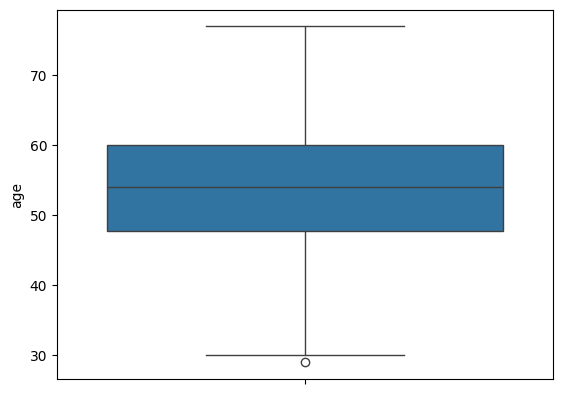

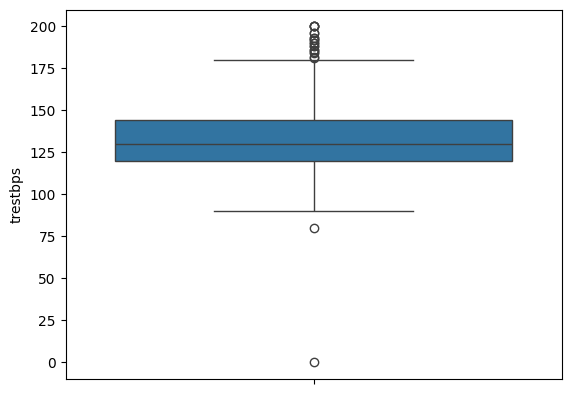

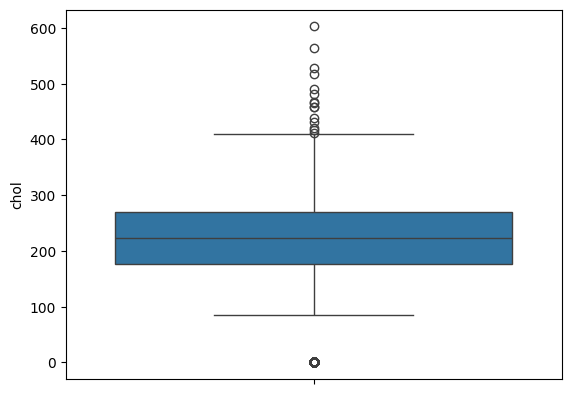

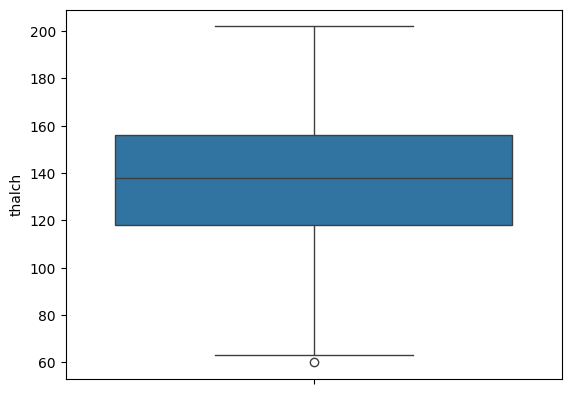

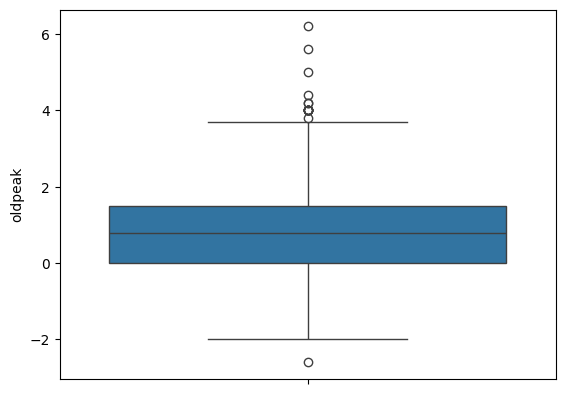

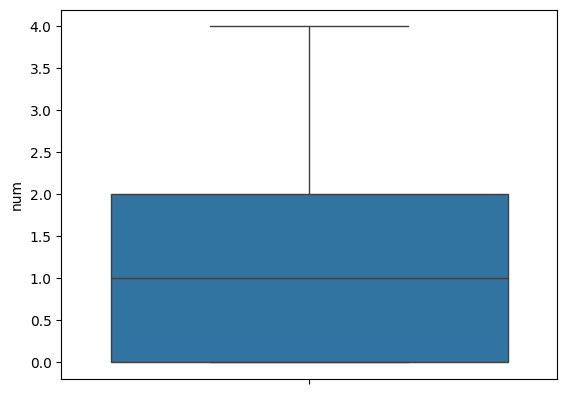

In [1204]:
# 2) Checking for Outliers and replacing them

for col in df.select_dtypes(include=["int", "float"]).columns:
    sns.boxplot(data=df, y=col)
    plt.show()

In [1205]:
def replace_outliers(df):
    def replace(col):
        Q1 = df[col].quantile(0.25)        
        Q3 = df[col].quantile(0.75)     
        IQR = Q3 - Q1
        lower_extreme = Q1 - 1.5*IQR   
        upper_extreme = Q3 + 1.5*IQR   
        df[col] = df[col].apply(lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x)

    for c in df.select_dtypes(include=["int", "float"]).columns:
        replace(c)

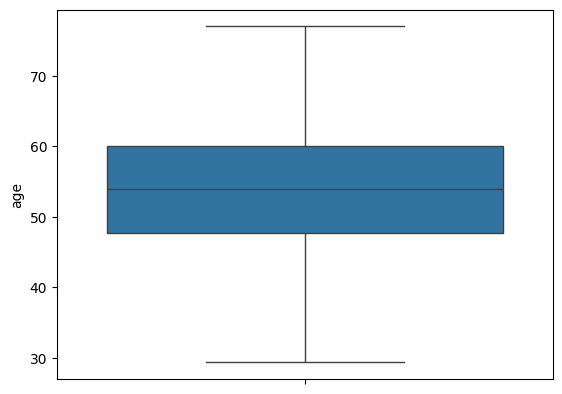

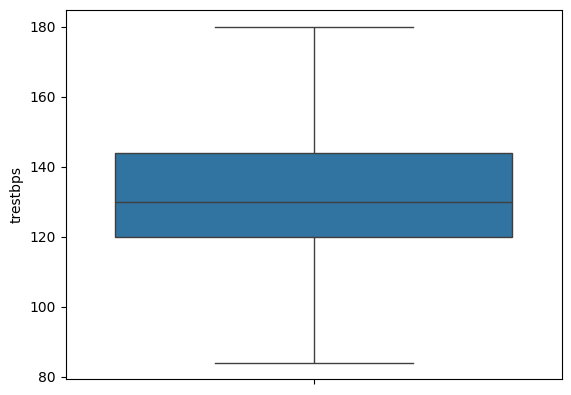

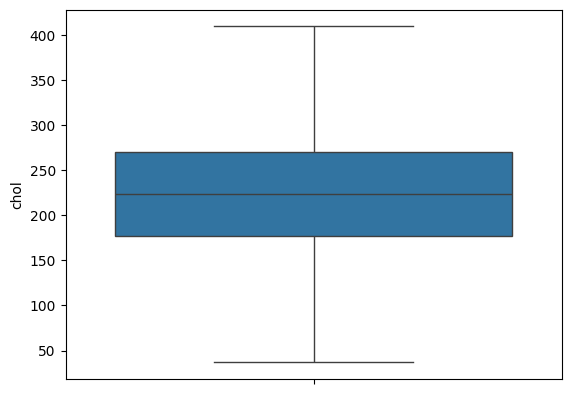

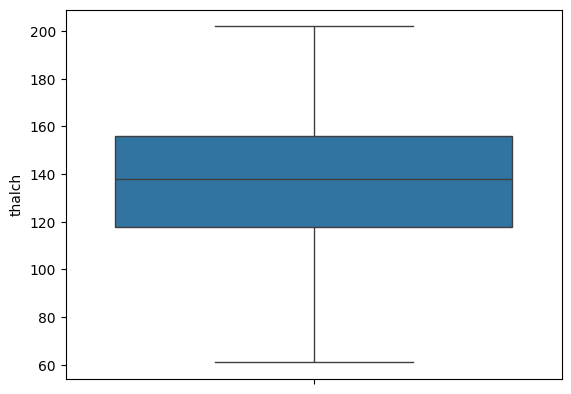

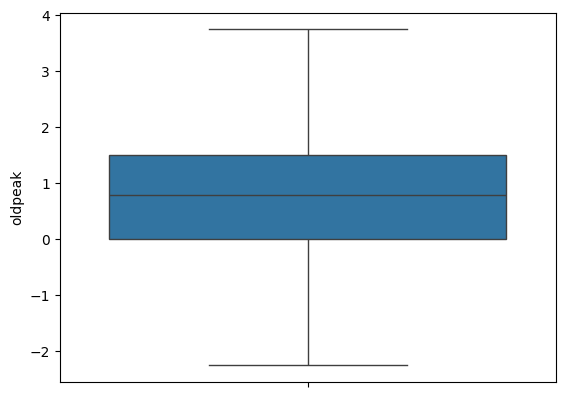

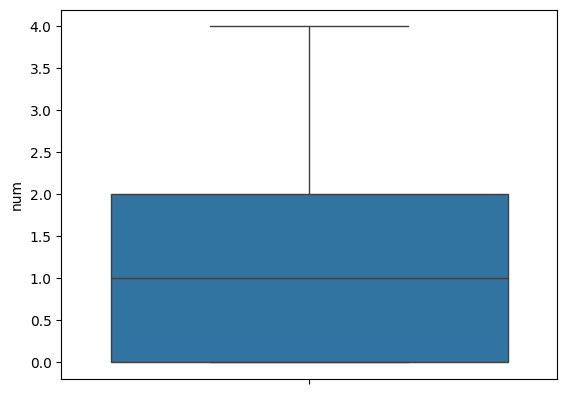

In [1206]:
replace_outliers(df)
for col in df.select_dtypes(include=["int", "float"]).columns:
    sns.boxplot(df[col])
    plt.show()


In [1207]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0


In [1208]:
# Renaming target column for better interpreting.
df.rename(columns={'num': 'heart disease stage'}, inplace=True)


# 2. Visualization

In [1209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  908 non-null    float64
 1   sex                  908 non-null    object 
 2   cp                   908 non-null    object 
 3   trestbps             908 non-null    float64
 4   chol                 908 non-null    float64
 5   fbs                  908 non-null    bool   
 6   restecg              908 non-null    object 
 7   thalch               908 non-null    float64
 8   exang                908 non-null    object 
 9   oldpeak              908 non-null    float64
 10  slope                908 non-null    object 
 11  thal                 908 non-null    object 
 12  heart disease stage  908 non-null    int64  
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 86.1+ KB


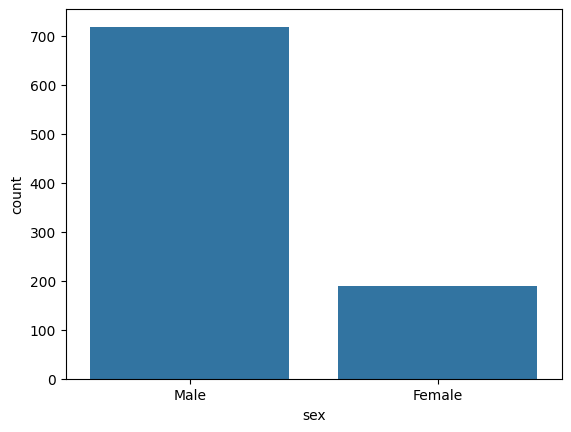

In [1210]:
sns.countplot(data=df,x="sex")
plt.show()

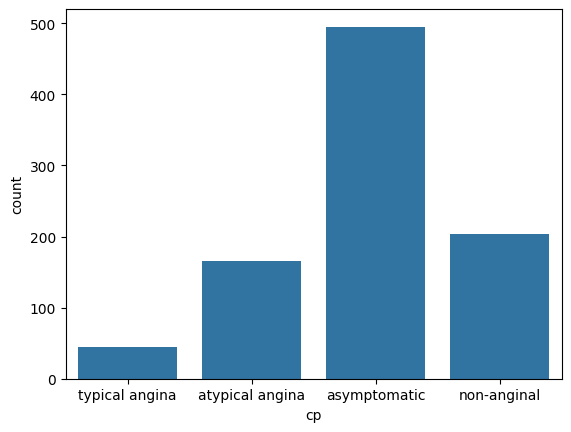

In [1211]:
sns.countplot(data=df,x="cp")
plt.show()

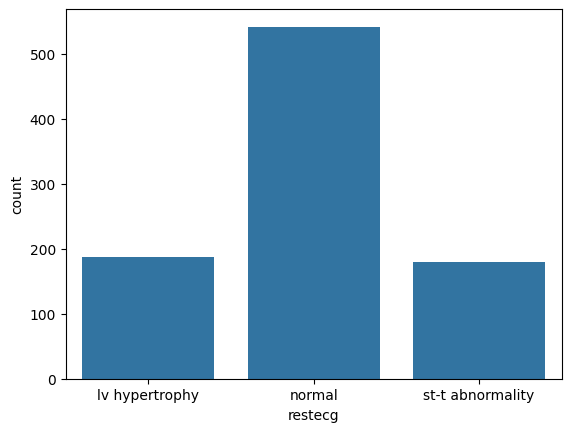

In [1212]:
sns.countplot(data=df,x="restecg")
plt.show()

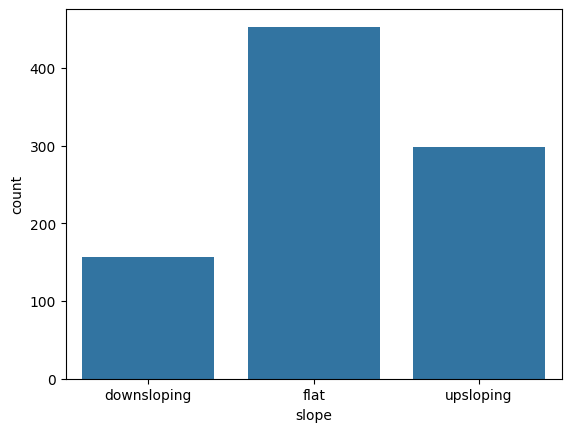

In [1213]:
sns.countplot(data=df,x="slope")
plt.show()

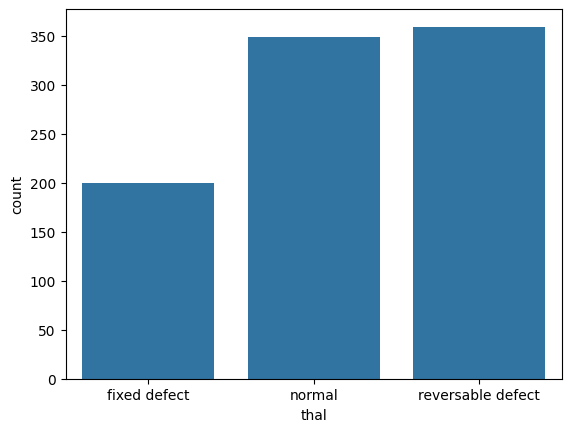

In [1214]:
sns.countplot(data=df,x="thal")
plt.show()

In [1215]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,heart disease stage
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0


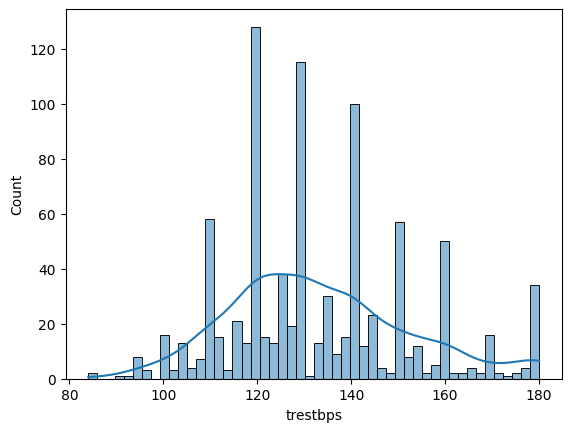

'\n- Upon carefully observing the the histogram, we can see that the mode for trestbps lies at 120 bps. \n- And we can also observe that the mean bps mostly lies between 120 - 140 bps \n'

In [1216]:
sns.histplot(data=df, x="trestbps", bins=50, kde=True)
plt.show()

'''
- Upon carefully observing the the histogram, we can see that the mode for trestbps lies at 120 bps. 
- And we can also observe that the mean bps mostly lies between 120 - 140 bps 
'''

In [1217]:
print(df["trestbps"].mean())
print(df["trestbps"].median())
print(df["trestbps"].mode())

133.28303964757708
130.0
0    120.0
Name: trestbps, dtype: float64


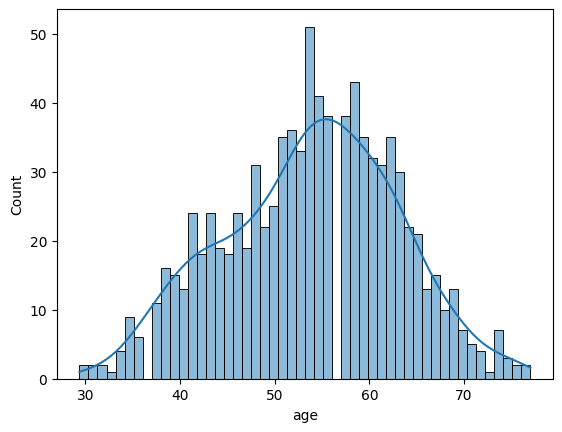

'\n- Upon carefully observing the the histogram, we can look that we are dealing with maximum patients of age 50-54. \n'

In [1218]:
sns.histplot(data=df, x="age", bins=50, kde=True)
plt.show()


'''
- Upon carefully observing the the histogram, we can look that we are dealing with maximum patients of age 50-54. 
'''

In [1219]:
print(df["age"].mean())
print(df["age"].median())
print(df["age"].mode())

53.79226321585903
54.0
0    54.0
Name: age, dtype: float64


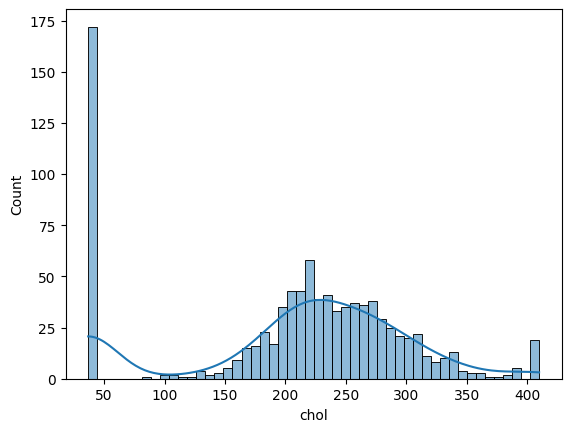

'\n - We can see that we are dealing with more patients having their cholestrol levels of about 30-40.\n'

In [1220]:
sns.histplot(data=df, x="chol", bins=50, kde=True)
plt.show()
'''
 - We can see that we are dealing with more patients having their cholestrol levels of about 30-40.
'''


In [1221]:
print(df["chol"].mean())
print(df["chol"].median())
print(df["chol"].mode())

207.35751651982378
224.0
0    36.875
Name: chol, dtype: float64


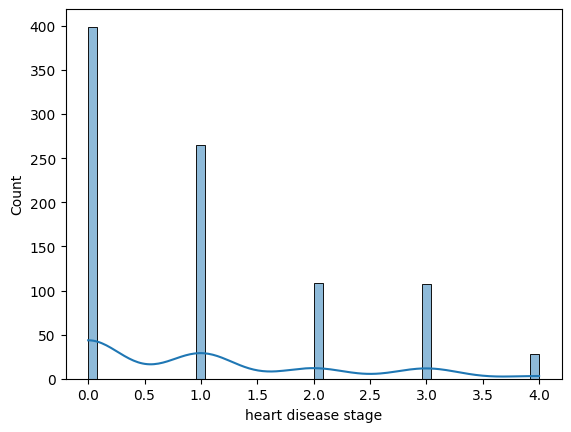

In [1222]:
sns.histplot(data=df, x="heart disease stage", bins=50, kde=True)
plt.show()


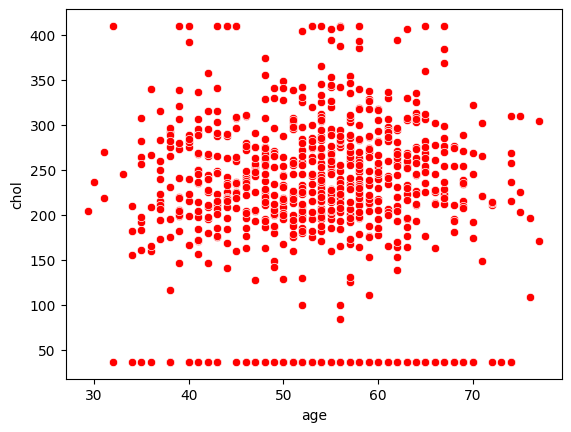

"\n - At first we would instinctively think that someone with age would be more prone to having higher cholesterol levels. But with the data we are dealing with, we can see that there isn't a noticeable relationship between cholesterol and age. We can cross verify by finding the correlation between them.\n"

In [1223]:
sns.scatterplot(data=df, x=df["age"], y=df["chol"], color="red")
plt.show()


'''
 - At first we would instinctively think that someone with age would be more prone to having higher cholesterol levels. But with the data we are dealing with, we can see that there isn't a noticeable relationship between cholesterol and age. We can cross verify by finding the correlation between them.
'''

In [1224]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,heart disease stage
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0


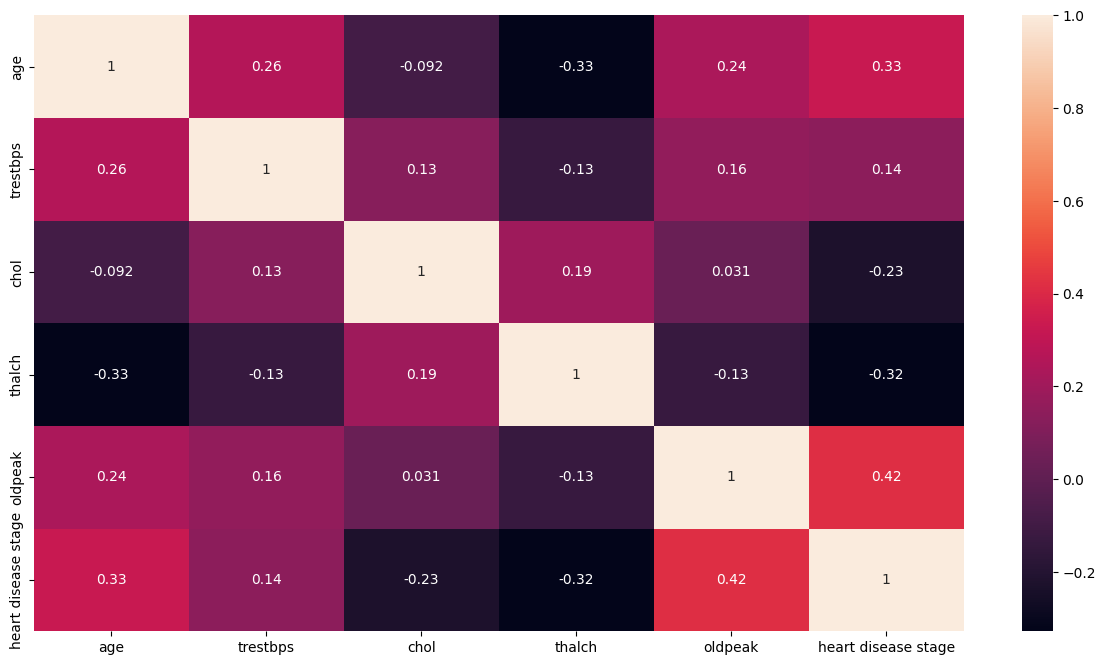

In [1225]:
corrs=df.select_dtypes(include=["int", "float"]).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrs, annot=True)
plt.show()

# 3. Feature Engineering

I. Feature Selection

In [1226]:
target = df["heart disease stage"]
features = df.drop(columns=["heart disease stage"])
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect


[28.19967424  4.80835847 17.46503015 34.82607774 50.93238806]


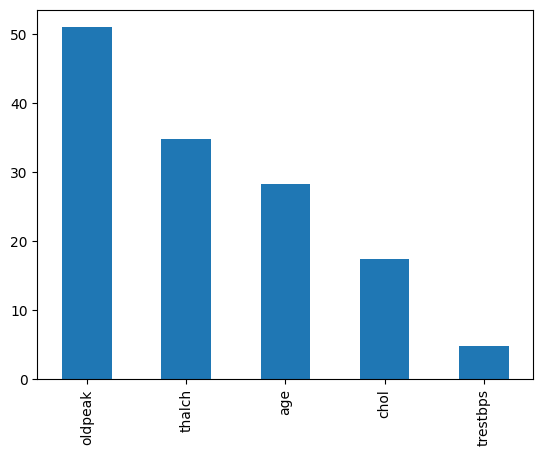

'\n - All numerical features seems to noticeably have some relationshop with the target.\n'

In [1227]:
numerical_features = features.select_dtypes(include=["int", "float"])
f_class= f_classif(numerical_features,target)
print(f_class[0])
pd.Series(f_class[0],index=numerical_features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()


'''
 - All numerical features seems to noticeably have some relationshop with the target.
'''

In [1228]:
vif= pd.DataFrame()
vif['features']= numerical_features.columns
vif['VIF_Score']= [variance_inflation_factor(numerical_features.values,i) for i in range(len(numerical_features.columns))]
vif.sort_values(ascending=False,by= 'VIF_Score')

,features,VIF_Score
1,trestbps,39.834890
0,age,29.561501
3,thalch,17.616296
2,chol,5.986302
4,oldpeak,1.873032


 There are some medical studies indicating that age might be an important indicator for analyzing heart health, so we will proceed by removing the "thalch" and "trestbps" features.

In [1229]:
features.drop(columns=["thalch", "trestbps"], inplace = True)

In [1230]:
features.head()
print(features["cp"].unique())
print(features["sex"].unique())
print(features["fbs"].unique())
print(features["restecg"].unique())
print(features["exang"].value_counts())
print(features["slope"].unique())
print(features["thal"].unique())

['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
['Male' 'Female']
[ True False]
['lv hypertrophy' 'normal' 'st-t abnormality']
exang
FALSE    535
TRUE     337
TURE      36
Name: count, dtype: int64
['downsloping' 'flat' 'upsloping']
['fixed defect' 'normal' 'reversable defect']


For the column "exang" we have some malformed values, where "TRUE" for some rows are mispelled as "TURE", we can rectify them.

In [1231]:
features["exang"] = ["TRUE" if value == "TURE" else value for value in features["exang"]]

II. Data Splitting

In [1232]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 10)
(182, 10)
(726,)
(182,)


III. Scaling and Feature Encoding 

In [1233]:
x_train.head()

,age,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,thal
255,50.0,Male,atypical angina,209.000,False,st-t abnormality,FALSE,0.0,flat,normal
189,53.0,Male,atypical angina,36.875,True,st-t abnormality,FALSE,0.7,downsloping,fixed defect
423,59.0,Female,asymptomatic,249.000,False,normal,TRUE,0.0,flat,normal
454,59.0,Male,typical angina,288.000,False,lv hypertrophy,FALSE,0.2,flat,reversable defect
637,49.0,Male,asymptomatic,206.000,False,normal,FALSE,0.0,flat,fixed defect


In [1234]:
std_sca=StandardScaler()
cols = ["age", "chol"]
x_train[cols]= std_sca.fit_transform(x_train[cols])
x_test[cols]= std_sca.transform(x_test[cols])

x_train.head()

,age,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,thal
255,-0.414590,Male,atypical angina,0.014420,False,st-t abnormality,FALSE,0.0,flat,normal
189,-0.085996,Male,atypical angina,-1.761295,True,st-t abnormality,FALSE,0.7,downsloping,fixed defect
423,0.571193,Female,asymptomatic,0.427077,False,normal,TRUE,0.0,flat,normal
454,0.571193,Male,typical angina,0.829417,False,lv hypertrophy,FALSE,0.2,flat,reversable defect
637,-0.524121,Male,asymptomatic,-0.016530,False,normal,FALSE,0.0,flat,fixed defect


In [1235]:
categorical_features = features.select_dtypes(include=["object", "boolean"]).columns
'''
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
'''
ord_enc = OrdinalEncoder()
x_train[categorical_features] = ord_enc.fit_transform(x_train[categorical_features])
x_test[categorical_features] = ord_enc.transform(x_test[categorical_features])

x_train.head()

,age,sex,cp,chol,fbs,restecg,exang,oldpeak,slope,thal
255,-0.414590,1.0,1.0,0.014420,0.0,2.0,0.0,0.0,1.0,1.0
189,-0.085996,1.0,1.0,-1.761295,1.0,2.0,0.0,0.7,0.0,0.0
423,0.571193,0.0,0.0,0.427077,0.0,1.0,1.0,0.0,1.0,1.0
454,0.571193,1.0,3.0,0.829417,0.0,0.0,0.0,0.2,1.0,2.0
637,-0.524121,1.0,0.0,-0.016530,0.0,1.0,0.0,0.0,1.0,0.0


# 4. Decision Tree Classification

In [1236]:

dec_tree = DecisionTreeClassifier(criterion="gini",splitter='best',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5439560439560439

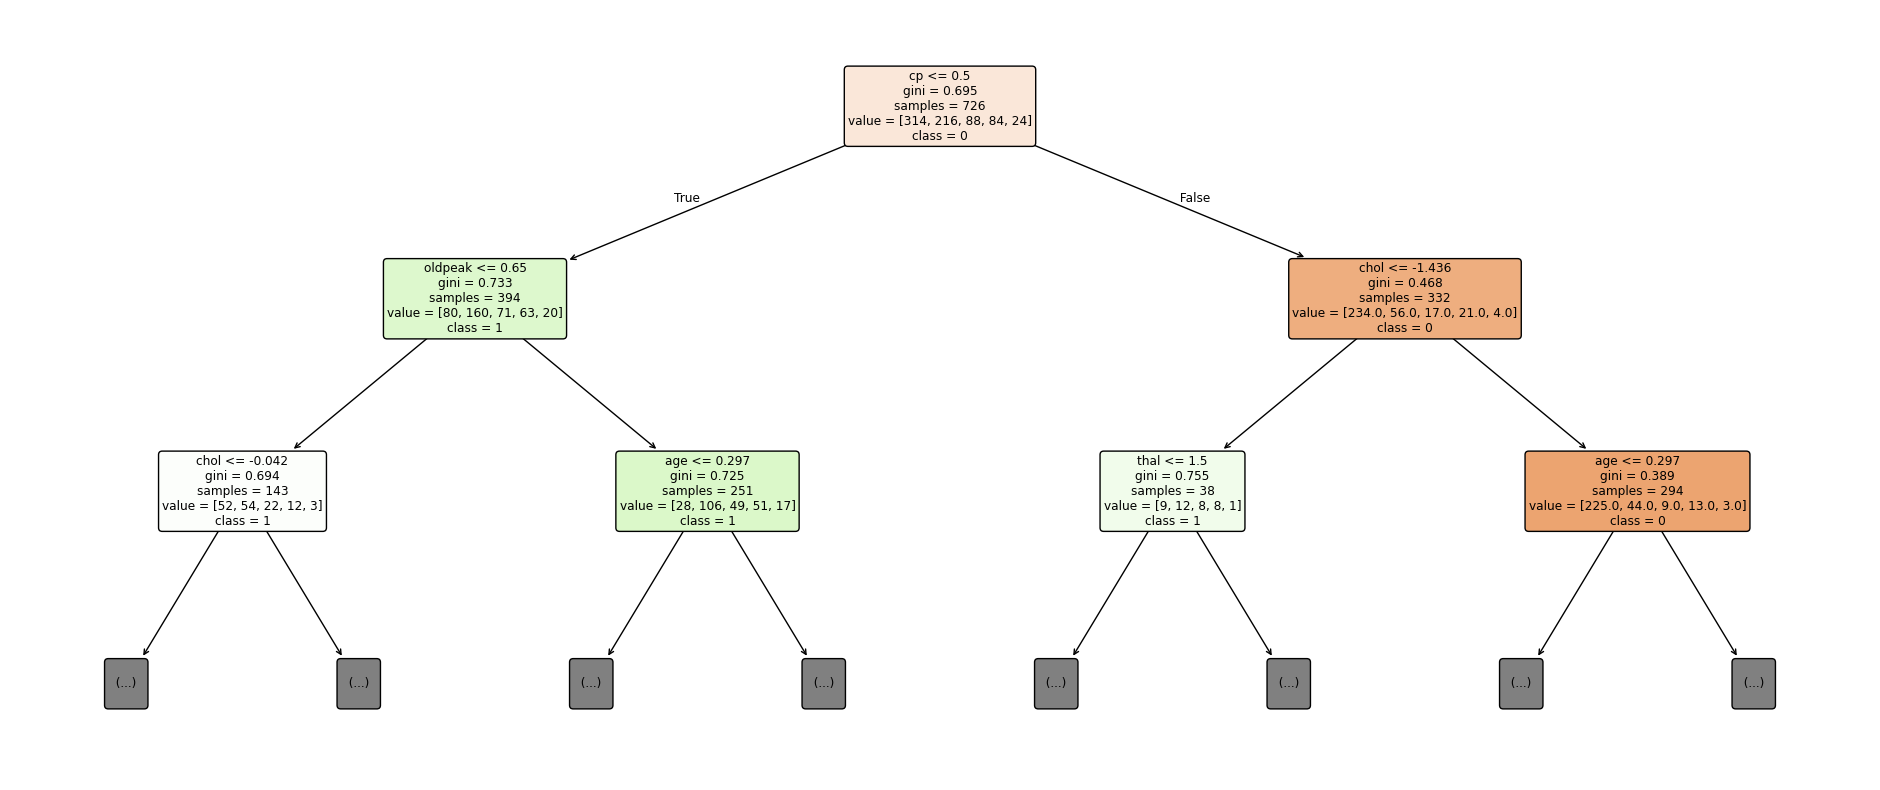

In [1247]:
plt.figure(figsize=(24,10))
plot_tree(dec_tree,filled=True,feature_names=list(features),class_names=[str(value) for value in df["heart disease stage"].unique()],rounded=True,max_depth=2)
plt.show();

Grid Search

In [ ]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,6)}
grid_search= GridSearchCV(estimator=dec_tree,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'},
 np.float64(0.5537931034482758))

# 5. Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

The hyperparameters that are available to tune the performance of a Decision Tree Model are, 
criterion = ["Entropy", "Gini"]
splitter = ["best", "random"]
max_depths = [0 - infinity]


a) Criterion - a Decision Tree can be built using two main fundamental methods,  
Entropy;
 - Used with Information Gain to choose the best split.
 - Slightly computationally expensive due to logarithms.

Gini;
 - Less sensitive to small probability changes than entropy.
 - Faster to compute (no logarithms).
 - Often gives similar splits to entropy in practice.


b) Splitter - Splitter decides how the decision node will be arranged after the root node.
Best;
 - The decision node id decided based on the Information gained formulae for each feature, and for every unique value the best suitable feature is selected as the decision Node 
Random;
 - Here the decision nodes are randomly arranged, often to reduce overfitting in some cases.
  

c) Max Depth - Max Depth is a number often entered between 1 - infinity, it basically decides the number of levels to be considered while calculating the result. If the number entered is more than the actual number of levels computed by the decision tree. Then the max depth is simply ignored, and the result is produced by considering all the nodes in all levels of the Decision Tree. If the max depth entered given is smaller than the actual number of levels computed, then only the first "max depth" number of levels are considered for producing the prediction.


2. What is the difference between the Label encoding and One-hot encoding?

a) Label Encoding;
 - Converts each category into a unique integer value (eg, Low => 0, Medium => 1, High => 2).
 - Simple and memory efficient.
 - Introduces an artificial order, which can mislead models.
 - Best suited for ordinal categorical data.


b) One-hot Encoding
 - Creates binary columns for each category, eg, If a feature has three unique categorical values (Red, Blue and Green), then for a row with "Red" values will be represented as "1" in a new "Red" column, and other two columns "Blue" and "Green" will be 0 and 0 respectively.
 - Avoids any ordinal relationship between categories.
 - Works well with linear and distance based models.
 - Increases dimensionality, especially with many categories.